In [1]:
''' initialize '''

''' IMPORT '''
from google.colab.patches import cv2_imshow
import cv2
import glob
import numpy as np
import os
import shutil
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from bs4 import BeautifulSoup as bs
from random import shuffle


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
mygd = "/content/drive/MyDrive/colab/imageRecognitionCourse/"

Mounted at /content/drive/


### 獲得動物資料集

https://www.kaggle.com/datasets/jirkadaberger/zoo-animals

In [3]:
''' DATASET '''
data_path = f"{mygd}/Final_test/Kaggle-Zoo_Animals.zip"
!mkdir -p ./zoo-animals/data/
!unzip {data_path} -d ./zoo-animals/data/

Archive:  /content/drive/MyDrive/colab/imageRecognitionCourse//Final_test/Kaggle-Zoo_Animals.zip
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/buffalo.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/capybara.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/cat.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/cow.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/deer.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/dog.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/elephant.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/flamingo.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/giraffe.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/jaguar.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/kangaroo.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/lion.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/parrot.zip  
 extracting: ./zoo-animals/data/Kaggle-Zoo Animals/penguin.zip  
 extracti

建立資料集存放處

In [4]:
!mkdir -p ./zoo-animals/data/input_dataset

# 輸入資料集使用 犀牛、水牛、企鵝、袋鼠、豹
!unzip "./zoo-animals/data/Kaggle-Zoo Animals/rhino.zip" -d ./zoo-animals/data/input_dataset/
!unzip "./zoo-animals/data/Kaggle-Zoo Animals/buffalo.zip" -d ./zoo-animals/data/input_dataset/
!unzip "./zoo-animals/data/Kaggle-Zoo Animals/penguin.zip" -d ./zoo-animals/data/input_dataset/
!unzip "./zoo-animals/data/Kaggle-Zoo Animals/kangaroo.zip" -d ./zoo-animals/data/input_dataset/
!unzip "./zoo-animals/data/Kaggle-Zoo Animals/jaguar.zip" -d ./zoo-animals/data/input_dataset/

串流輸出內容已截斷至最後 5000 行。
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_2_89.xml  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_100.jpg  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_100.xml  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_117.jpg  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_117.xml  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_118.jpg  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_118.xml  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_119.jpg  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_119.xml  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_122.jpg  
  inflating: ./zoo-animals/data/input_dataset/kangaroo/test/Kangaroo_Download_3_

不使用原始資料集分好的train和test分類

In [5]:
# import os
# import shutil
# from pathlib import Path

def copy_files(src_folder, dest_folder, extensions):
    """
    將src_folder中的指定擴展名文件複製到dest_folder
    """
    src_path = Path(src_folder)
    dest_path = Path(dest_folder)
    dest_path.mkdir(parents=True, exist_ok=True)  # 確保目標資料夾存在

    for extension in extensions:
        for file in src_path.glob(extension):
            shutil.copy(file, dest_path)

    if src_path.exists() and src_path.is_dir():
        shutil.rmtree(src_path)

folders = [
    {"src": "./zoo-animals/data/input_dataset/rhino/train", "dest": "./zoo-animals/data/input_dataset/rhino"},
    {"src": "./zoo-animals/data/input_dataset/rhino/test", "dest": "./zoo-animals/data/input_dataset/rhino"},
    {"src": "./zoo-animals/data/input_dataset/buffalo/train", "dest": "./zoo-animals/data/input_dataset/buffalo"},
    {"src": "./zoo-animals/data/input_dataset/buffalo/test", "dest": "./zoo-animals/data/input_dataset/buffalo"},
    {"src": "./zoo-animals/data/input_dataset/penguin/train", "dest": "./zoo-animals/data/input_dataset/penguin"},
    {"src": "./zoo-animals/data/input_dataset/penguin/test", "dest": "./zoo-animals/data/input_dataset/penguin"},
    {"src": "./zoo-animals/data/input_dataset/kangaroo/train", "dest": "./zoo-animals/data/input_dataset/kangaroo"},
    {"src": "./zoo-animals/data/input_dataset/kangaroo/test", "dest": "./zoo-animals/data/input_dataset/kangaroo"},
    {"src": "./zoo-animals/data/input_dataset/jaguar/train", "dest": "./zoo-animals/data/input_dataset/jaguar"},
    {"src": "./zoo-animals/data/input_dataset/jaguar/test", "dest": "./zoo-animals/data/input_dataset/jaguar"},
]

extensions = ['*.xml', '*.jpg']

# 複製文件
for folder in folders:
    copy_files(folder['src'], folder['dest'], extensions)


### 檢查原始資料集

參考: https://www.kaggle.com/code/vencerlanz09/sea-animals-classification-using-efficeintnetb7

In [6]:
# import os

def walk_through_dir(directory):
    # 遍歷主目錄並計算目錄和圖片數量
    for root, dirs, files in os.walk(directory):
        num_dirs = len(dirs)
        num_files = len([f for f in files if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
        print(f"There are {num_dirs} directories and {num_files} images in '{root}'.")


dataset = "./zoo-animals/data/input_dataset"
walk_through_dir(dataset)

There are 5 directories and 0 images in './zoo-animals/data/input_dataset'.
There are 0 directories and 286 images in './zoo-animals/data/input_dataset/buffalo'.
There are 0 directories and 1370 images in './zoo-animals/data/input_dataset/rhino'.
There are 0 directories and 1128 images in './zoo-animals/data/input_dataset/jaguar'.
There are 0 directories and 1498 images in './zoo-animals/data/input_dataset/kangaroo'.
There are 0 directories and 2856 images in './zoo-animals/data/input_dataset/penguin'.


<ipython-input-7-b5aa138feaf9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')


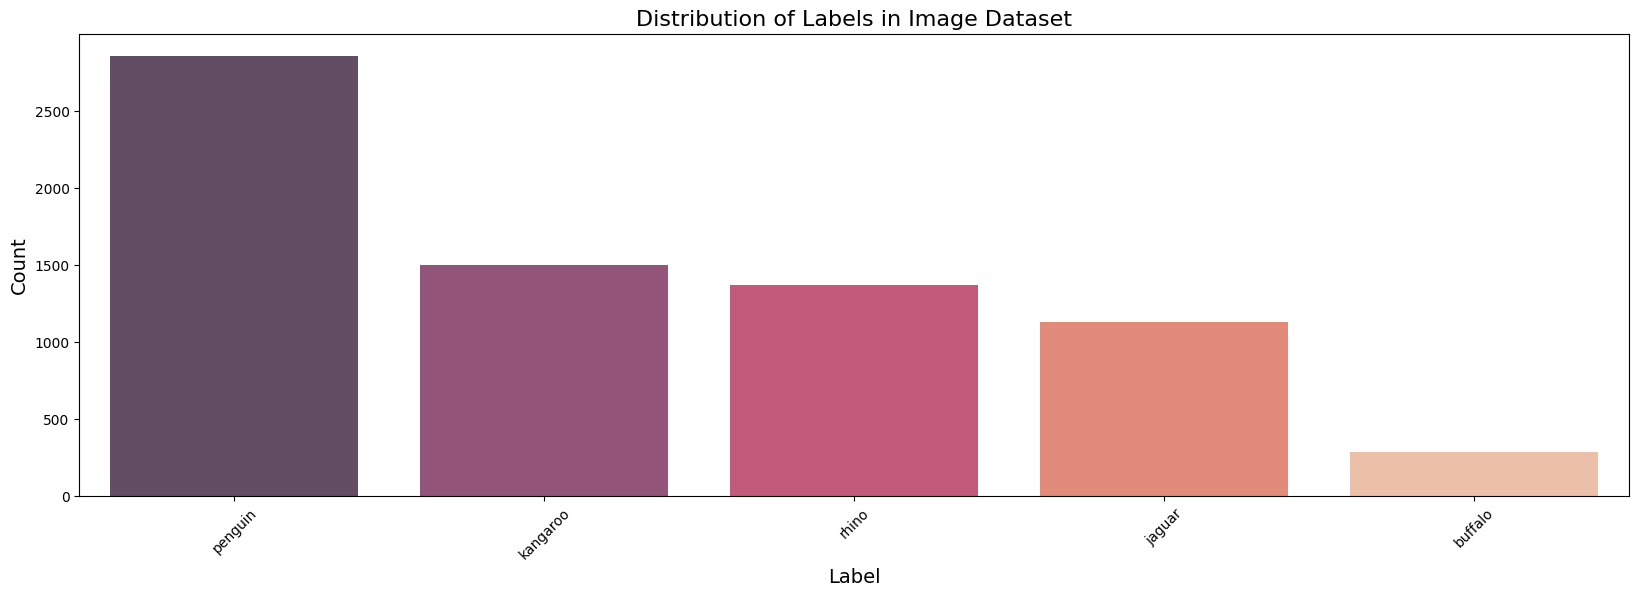

In [7]:
# import cv2
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from pathlib import Path

image_dir = Path(dataset)

# Get filepaths and labels
extensions = ['*.JPG', '*.jpg', '*.png', '*.PNG', '*.bmp', '*.BMP', '*.jpeg', '*.JPEG']
filepaths = [filepath for ext in extensions for filepath in image_dir.glob(f'**/{ext}')]

labels = [filepath.parent.name for filepath in filepaths]

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Show
label_counts = image_df['Label'].value_counts()

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='rocket')
plt.title('Distribution of Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

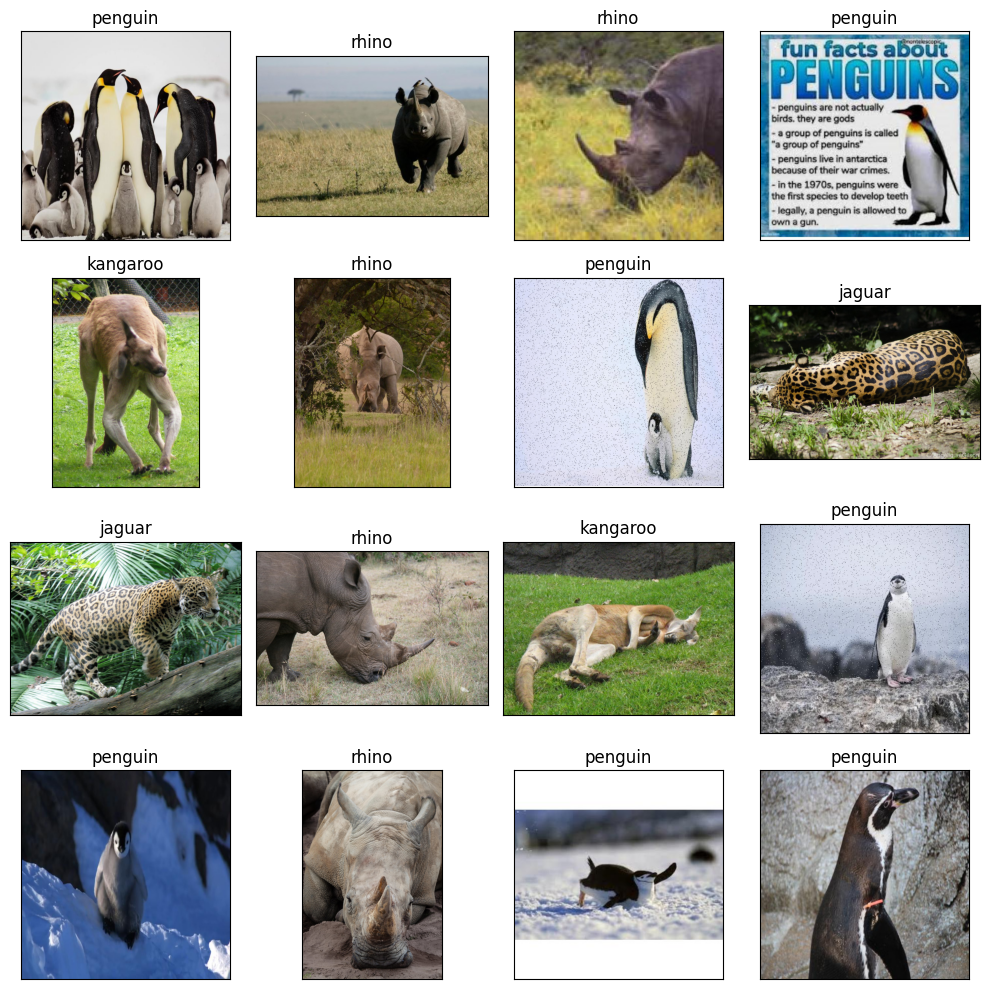

In [8]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df["Filepath"][random_index[i]]))
    ax.set_title(image_df["Label"][random_index[i]])

plt.tight_layout()
plt.show()

### 原始資料集錯誤率分析 -----(未完待續)-----

### Yolo不接受voc格式(.xml)的label標記，原始資料集需轉換成Yolo要求的格式(.txt)

In [9]:
def cv2yoloLabel(img_w: int, img_h: int, x1: int, y1: int, x2: int, y2: int):
    """
    將OpenCV格式的標籤轉換為YOLO格式的標籤。

    參數:
    - img_w: 圖像的寬度
    - img_h: 圖像的高度
    - x1, y1: 矩形左上角的座標
    - x2, y2: 矩形右下角的座標

    返回:
    - (r_x, r_y, r_w, r_h): YOLO格式的標籤，包括物體中心的相對座標 (r_x, r_y) 和相對尺寸 (r_w, r_h)
    """
    # 計算矩形的寬度和高度
    w = x2 - x1
    h = y2 - y1
    # 計算矩形中心點的相對座標
    r_x = (x1 + w/2) / img_w
    r_y = (y1 + h/2) / img_h
    # 計算矩形寬度和高度的相對尺寸
    r_w = w / img_w
    r_h = h / img_h
    # 返回YOLO格式的標籤
    return r_x, r_y, r_w, r_h

def yolo2cvLabel(img_w: int, img_h: int, r_x: float, r_y: float, r_w: float, r_h: float):
    """
    將YOLO格式的標籤轉換為OpenCV格式的標籤。

    參數:
    - img_w: 圖像的寬度
    - img_h: 圖像的高度
    - r_x, r_y: 物體中心的相對座標
    - r_w, r_h: 物體的相對寬度和高度

    返回:
    - (int(x1), int(y1), int(x2), int(y2)): OpenCV格式的標籤，包括左上角 (x1, y1) 和右下角 (x2, y2) 的座標
    """
    # 根據相對尺寸計算實際的矩形寬度和高度
    w = r_w * img_w
    h = r_h * img_h
    # 計算矩形左上角的座標
    x1 = r_x * img_w - round(w/2)
    y1 = r_y * img_h - round(h/2)
    # 計算矩形右下角的座標
    x2 = x1 + w
    y2 = y1 + h
    # 返回OpenCV格式的標籤
    return int(x1), int(y1), int(x2), int(y2)


In [10]:
!mkdir -p ./animals/data/images-1-coverted/  # 暫存區

# 進行資料格式轉換

In [11]:
classes = ("Rhino", "Buffalo", "Penguin", "Kangaroo", "Jaguar")

def voc2yolo(classes: tuple, voc_file: str, yolo_file: str):
    """
    將VOC格式的XML標記文件轉換為YOLO格式的標記文件。

    參數:
    - classes: 一個包含所有類別名稱的tuple
    - voc_file: VOC格式的XML檔案路徑
    - yolo_file: 輸出的YOLO格式標記文件路徑

    返回:
    - 無返回值，但會將轉換的結果寫入yolo_file
    """
    out = ""
    with open(voc_file, "r") as xml:
        content = xml.read()
        sp = bs(content, "html.parser")
        img_w = float(sp.find("width").text)
        img_h = float(sp.find("height").text)

        boxes = sp.find_all("object")
        for box in boxes:
            class_name = box.find("name").text
            if class_name not in classes:
                print(f"Warning: Class '{class_name}' not found in defined classes.")
                continue  # 跳過未定義的類別

            x1 = float(box.find("xmin").text)
            y1 = float(box.find("ymin").text)
            x2 = float(box.find("xmax").text)
            y2 = float(box.find("ymax").text)

            classes_index = classes.index(class_name)
            x, y, w, h = cv2yoloLabel(img_w, img_h, x1, y1, x2, y2) # 轉成Yolo的格式
            out += f"{classes_index} {x} {y} {w} {h}\n"
    with open(yolo_file, "w") as txt:
        txt.write(out)

def covert_dataset(classes: tuple, src_images_dir: str, dset_images_dir: str):
    """
    轉換整個資料集的圖片格式並生成對應的YOLO標記文件。

    參數:
    - classes: 類別名稱tuple
    - src_images_dir: 原始圖片資料夾路徑
    - dset_images_dir: 轉換後存放圖片和標記的資料夾路徑

    返回:
    - 無返回值，但會在指定目錄中生成轉換後的檔案
    """
    imgs = glob.glob(f"{src_images_dir}*.jpg", recursive=True)
    for img in imgs:
        fname = Path(img).stem  # 只取檔案名稱，不包含副檔名
        print(f"Processing {fname}...")

        # 讀取圖像並儲存為 BMP 格式
        image = cv2.imread(img)
        if image is None:
            print(f"Failed to read image {img}")
            continue

        # 保留子資料夾結構
        # relative_path = os.path.relpath(img, src_images_dir)
        # relative_dir = os.path.dirname(relative_path)
        # target_img_dir = os.path.join(dset_images_dir, img)

        # if not os.path.exists(target_img_dir):
        #     os.makedirs(target_img_dir)

        target_img_path = os.path.join(dset_images_dir, f"{fname}.bmp")
        cv2.imwrite(target_img_path, image)  # 儲存為 BMP 格式

        # 讀取對應的 XML 標記檔案並轉換為 YOLO 格式
        xml_file = os.path.join(os.path.dirname(img), f"{fname}.xml")
        yolo_file = os.path.join(dset_images_dir, f"{fname}.txt")
        voc2yolo(classes, xml_file, yolo_file)

# 呼叫函式進行資料集轉換
covert_dataset(classes,
    src_images_dir="./zoo-animals/data/input_dataset/**/",
    dset_images_dir="./animals/data/images-1-coverted")

Processing Buffalo_Download_257...
Processing Buffalo_Download_112...
Processing Buffalo_Download_122...
Processing Buffalo_Download_216...
Processing Buffalo_Download_366...


/usr/lib/python3.10/html/parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


串流輸出內容已截斷至最後 5000 行。
Processing Jaguar_372...
Processing Jaguar_250...
Processing Jaguar_Download_1_72...
Processing Jaguar_3882...
Processing Jaguar_Download_1_189...
Processing Jaguar_Download_1_4...
Processing Jaguar_Download_1_3...
Processing Jaguar_616...
Processing Jaguar_3863...
Processing Jaguar_625...
Processing Jaguar_3912...
Processing Jaguar_Download_1_43...
Processing Jaguar_3849...
Processing Jaguar_1733...
Processing Jaguar_521...
Processing Jaguar_3270...
Processing Jaguar_Download_1_125...
Processing Jaguar_1...
Processing Jaguar_Download_1_15...
Processing Jaguar_Download_1_61...
Processing Jaguar_3285...
Processing Jaguar_60...
Processing Jaguar_212...
Processing Jaguar_245...
Processing Jaguar_258...
Processing Jaguar_3832...
Processing Jaguar_588...
Processing Jaguar_248...
Processing Jaguar_964...
Processing Jaguar_452...
Processing Jaguar_Download_1_2...
Processing Jaguar_544...
Processing Jaguar_Download_1_40...
Processing Jaguar_609...
Processing Jaguar_3851...

### 畫上標記框 (確認原始資料用)

In [12]:
!mkdir -p ./animals/data/images-2-marked/

In [13]:
colors = ((0,165,255), (0,0,255), (0,255,0), (128,0,128), (255,255,0))  # 分別對應於橙色、紅色、綠色

def draw_box(img, box: tuple, label: str,
             box_color:tuple=(0,255,0), box_thick=1,
             font_face=cv2.FONT_HERSHEY_COMPLEX_SMALL,
             font_size=.6, font_color=(0,0,0), font_thick=1):
    """
    在圖像上繪製一個包含文字標籤的矩形框。

    參數:
    - img: 要繪製的圖像
    - box: 矩形框的座標，格式為 (x1, y1, x2, y2)
    - label: 矩形框內顯示的標籤文字
    - box_color: 矩形框的顏色
    - box_thick: 矩形框的線條粗細
    - font_face: 文字的字體
    - font_size: 文字的大小
    - font_color: 文字的顏色
    - font_thick: 文字的線條粗細
    """
    x1, y1, x2, y2 = box
    cv2.rectangle(img, (x1, y1), (x2, y2), box_color, box_thick)
    (fw, fh), _ = cv2.getTextSize(label, font_face, font_size, font_thick)
    p = 1 # padding
    cv2.rectangle(img, (x1, y1), (x1 + fw + p*2, y1 + fh + p*2), box_color, -1)
    cv2.putText(img, label, (x1 + p, y1 + fh + p), font_face, font_size, font_color, font_thick)


def yolo2cvLabel(img_w, img_h, x_center, y_center, width, height):
    """
    將YOLO標籤格式轉換為OpenCV格式。

    參數:
    - img_w: 圖像的寬度
    - img_h: 圖像的高度
    - x_center: 標籤中心的x座標
    - y_center: 標籤中心的y座標
    - width: 標籤的寬度
    - height: 標籤的高度

    返回:
    - 矩形框的座標，格式為 (x1, y1, x2, y2)
    """
    x1 = int((x_center - width / 2) * img_w)
    y1 = int((y_center - height / 2) * img_h)
    x2 = int((x_center + width / 2) * img_w)
    y2 = int((y_center + height / 2) * img_h)
    return x1, y1, x2, y2


def mark_dataset(classes, src_db_dir: str, dest_db_dir: str, src_subpath="*.bmp"):
    """
    從原始圖像文件讀取YOLO標記並在圖像上繪製標籤框，然後保存到新的目錄中。

    參數:
    - classes: 類別名稱的tuple
    - src_db_dir: 原始圖像的目錄路徑
    - dest_db_dir: 儲存繪製標籤後圖像的目錄路徑
    - src_subpath: 原始圖像文件的副檔名
    """
    src_path_len = len(src_db_dir)
    imgs = glob.glob(f"{src_db_dir}/{src_subpath}", recursive=True)
    if not imgs:
        print(f"No images found in {src_db_dir} with extension {src_subpath}")
        return

    for src_img in imgs:

        src_label = src_img[:-4] + ".txt" # 標記檔案路徑
        dest_img_path = os.path.join(dest_db_dir, src_img[src_path_len:-4] + ".jpg")
        dest_img_dir = os.path.dirname(dest_img_path)
        if not os.path.exists(dest_img_dir):
            os.makedirs(dest_img_dir)

        img = cv2.imread(src_img)
        if img is None:
            print(f"Failed to read image {src_img}")
            continue

        img_h, img_w, _ = img.shape
        with open(src_label, "r") as file:
            for line in file.read().splitlines():
                cls, rx, ry, rw, rh = [float(v) for v in line.split(" ")]
                cls = int(cls)
                x1, y1, x2, y2 = yolo2cvLabel(img_w, img_h, rx, ry, rw, rh)
                draw_box(img, (x1, y1, x2, y2), classes[cls], colors[cls])
            cv2.imwrite(dest_img_path, img)
            print(f"Image saved to {dest_img_path}")

mark_dataset(
    classes = classes,
    src_db_dir = "./animals/data/images-1-coverted/",
    dest_db_dir = "./animals/data/images-2-marked"
)

串流輸出內容已截斷至最後 5000 行。
Image saved to ./animals/data/images-2-marked/Penguin_Download_3_train_336.jpg
Image saved to ./animals/data/images-2-marked/Kangaroo_211.jpg
Image saved to ./animals/data/images-2-marked/Penguin_Download_2_train_1173.jpg
Image saved to ./animals/data/images-2-marked/Kangaroo_218.jpg
Image saved to ./animals/data/images-2-marked/Penguin_Download_4_train_355.jpg
Image saved to ./animals/data/images-2-marked/Kangaroo_Download_3_122.jpg
Image saved to ./animals/data/images-2-marked/Buffalo_Download_214.jpg
Image saved to ./animals/data/images-2-marked/Penguin_Download_4_train_917.jpg
Image saved to ./animals/data/images-2-marked/Penguin_Download_4_train_563.jpg
Image saved to ./animals/data/images-2-marked/Penguin_Download_4_train_890.jpg
Image saved to ./animals/data/images-2-marked/Rhino_Download_1_122.jpg
Image saved to ./animals/data/images-2-marked/Penguin_Download_2_train_1128.jpg
Image saved to ./animals/data/images-2-marked/Rhino_Dow_266.jpg
Image saved to ./a

## 資料分割
- 訓練集
- 驗證集
- 測試集

In [14]:
# 暫存區
!mkdir -p /content/animals/data/images-3-splite/train
!mkdir -p /content/animals/data/images-3-splite/val
!mkdir -p /content/animals/data/images-3-splite/test

In [15]:
# import glob
# import os
# import shutil
# from pathlib import Path
# from random import shuffle


def copy2subset_dir(src_images_dir:str, dset_images_dir:str, dest_lists_dir:str, subset_name:str, subset_images:list):
    """
    將指定的圖像及其標籤文件從來源目錄複製到指定的子集目錄中，並記錄這些圖像的路徑。

    參數:
    - src_images_dir: 原始圖像所在的目錄
    - dset_images_dir: 存放子集的目標目錄
    - dest_lists_dir: 存放路徑列表文件的目錄
    - subset_name: 子集的名稱
    - subset_images: 要複製的圖像路徑列表
    """
    dest_dir_path = os.path.join(dset_images_dir, subset_name)

    path_list = ""
    for img_path in subset_images:
        img_name = Path(img_path).name
        shutil.copyfile(img_path, os.path.join(dest_dir_path, img_name))  # 複製到指定路徑

        label_path = img_path[:-4] + ".txt"
        label_name = Path(label_path).name
        shutil.copyfile(label_path, os.path.join(dest_dir_path, label_name))

        path_list += img_path + "\n"

    with open(f"{dest_lists_dir}/{subset_name}_list.txt", "w") as txt:
        txt.write(path_list.strip())


def splite_dataset(src_images_dir:str, dset_images_dir:str, dest_lists_dir:str, subset_names:tuple, subset_percentages:tuple):
    """
    將圖像數據集根據指定的百分比分割成多個子集。

    參數:
    - src_images_dir: 原始圖像的目錄路徑
    - dset_images_dir: 存放生成的子集的目標目錄
    - dest_lists_dir: 存放子集路徑列表的目錄
    - subset_names: 子集的名稱組成的tuple
    - subset_percentages: 每個子集分配的圖像百分比組成的tuple
    """
    src_images_path = glob.glob(src_images_dir + "/*.bmp")
    imgs_len = len(src_images_path)
    shuffle(src_images_path)  # (***) 必須打亂順序

    subset_begin = 0
    for i, subset_name in enumerate(subset_names):
        if i < len(subset_percentages):
            subset_percentage = subset_percentages[i]
            subset_num = int(imgs_len * subset_percentage / 100)  # 資料集圖片數量
            subset_end = subset_begin + subset_num
        else:
            subset_end = imgs_len

        copy2subset_dir(
            src_images_dir, dset_images_dir, dest_lists_dir, subset_name,
            subset_images=src_images_path[subset_begin:subset_end]
        )
        subset_begin = subset_end


splite_dataset(
    src_images_dir = "./animals/data/images-1-coverted",
    dset_images_dir = "./animals/data/images-3-splite",
    dest_lists_dir = "./animals/data",
    subset_names = ("test", "train", "val"),
    subset_percentages = (10, 80, 10) # 依照10%、80%、10%來切分
)


### Mark subset (確認結果用)

In [16]:
!mkdir -p /content/animals/data/images-4-marked/train
!mkdir -p /content/animals/data/images-4-marked/val
!mkdir -p /content/animals/data/images-4-marked/test

In [17]:
mark_dataset(
    # classes=short_classes,
    classes = classes,
    src_db_dir = "./animals/data/images-3-splite/",
    dest_db_dir = "./animals/data/images-4-marked",
    src_subpath = "**/*.bmp"
)

串流輸出內容已截斷至最後 5000 行。
Image saved to ./animals/data/images-4-marked/train/Jaguar_585.jpg
Image saved to ./animals/data/images-4-marked/train/Penguin_Download_4_train_61.jpg
Image saved to ./animals/data/images-4-marked/train/Rhino_776.jpg
Image saved to ./animals/data/images-4-marked/train/Penguin_Download_1_train_26.jpg
Image saved to ./animals/data/images-4-marked/train/Kangaroo_Download_3_14.jpg
Image saved to ./animals/data/images-4-marked/train/Rhino_899.jpg
Image saved to ./animals/data/images-4-marked/train/Penguin_Download_4_train_767.jpg
Image saved to ./animals/data/images-4-marked/train/Kangaroo_Download_3_110.jpg
Image saved to ./animals/data/images-4-marked/train/Penguin_Download_2_train_364.jpg
Image saved to ./animals/data/images-4-marked/train/Penguin_Download_2_train_711.jpg
Image saved to ./animals/data/images-4-marked/train/Kangaroo_360.jpg
Image saved to ./animals/data/images-4-marked/train/Penguin_Download_2_train_181.jpg
Image saved to ./animals/data/images-4-marke

### subset計數  (確認結果用)

In [18]:
# import glob
# import re

def count_dataset(src_images_dir):
    """
    統計指定目錄下各個子目錄（代表不同的子集）中的圖像數量及各類別的數量。

    參數:
    - src_images_dir: 存放子集的圖像目錄路徑

    輸出:
    - 打印出每個子集的圖像總數以及每個類別的數量
    """
    txts = glob.glob(f"{src_images_dir}/*/*.txt")  # 使用glob模組搜尋所有.txt檔案
    counts = {}  # 初始化一個字典來存放結果
    print(txts)
    for txt in txts:
        set_name = re.sub(r"^.*\/(\w+)\/\w+\.txt$", r"\1", txt)  # 使用正則表達式從文件路徑中提取子集名稱
        if set_name not in counts:
            counts[set_name] = [0, 0, 0, 0, 0, 0]  # 如果子集名稱還沒有在字典中，初始化計數
        counts[set_name][0] += 1  # 為該子集的圖像數增加一
        with open(txt, "r") as file:
            for line in file.readlines():
                cls = int(line.split(" ")[0])  # 從每一行中讀取類別編號
                counts[set_name][cls+1] += 1  # 根據類別編號更新計數
    print("set: [img, rhino, buffalo, penguin, kangaroo, jaguar]")  # 打印標題
    print(counts)  # 打印統計結果


count_dataset("./animals/data/images-3-splite")


['./animals/data/images-3-splite/train/Rhino_2223.txt', './animals/data/images-3-splite/train/Penguin_Download_2_train_386.txt', './animals/data/images-3-splite/train/Penguin_Download_3_train_34.txt', './animals/data/images-3-splite/train/Penguin_Download_2_train_401.txt', './animals/data/images-3-splite/train/Rhino_149.txt', './animals/data/images-3-splite/train/Rhino_1291.txt', './animals/data/images-3-splite/train/Penguin_Download_3_train_191.txt', './animals/data/images-3-splite/train/Kangaroo_435.txt', './animals/data/images-3-splite/train/Kangaroo_Download_1_76.txt', './animals/data/images-3-splite/train/Kangaroo_446.txt', './animals/data/images-3-splite/train/Kangaroo_Download_1_95.txt', './animals/data/images-3-splite/train/Kangaroo_148.txt', './animals/data/images-3-splite/train/Penguin_Download_4_train_433.txt', './animals/data/images-3-splite/train/Rhino_Download_1_20.txt', './animals/data/images-3-splite/train/Kangaroo_Download_3_234.txt', './animals/data/images-3-splite/tr

### 搬到正式資料夾

In [19]:
!mkdir -p /content/animals/data/images
!mv /content/animals/data/images-3-splite/* /content/animals/data/images

In [20]:
!rm -r !mv /content/animals/data/images/images-3-splite

rm: cannot remove '!mv': No such file or directory
rm: cannot remove '/content/animals/data/images/images-3-splite': No such file or directory


In [21]:
def replace_text_in_file(file_path, old_text, new_text):
    with open(file_path, 'r+') as f:
        content = f.read()
        content = content.replace(old_text, new_text)
        f.seek(0)
        f.write(content)
        f.truncate()


file_path = "./animals/data/test_list.txt"
old_text = "/images-1-coverted/"
new_text = "/images/test/"

replace_text_in_file(file_path, old_text, new_text)

file_path = "./animals/data/train_list.txt"
old_text = "/images-1-coverted/"
new_text = "/images/train/"

replace_text_in_file(file_path, old_text, new_text)

file_path = "./animals/data/val_list.txt"
old_text = "/images-1-coverted/"
new_text = "/images/val/"

replace_text_in_file(file_path, old_text, new_text)

# 標籤分類

In [22]:
!mkdir -p /content/animals/data/labels/train
!mv /content/animals/data/images/train/*.txt /content/animals/data/labels/train

!mkdir -p /content/animals/data/labels/val
!mv /content/animals/data/images/val/*.txt /content/animals/data/labels/val

!mkdir -p /content/animals/data/labels/test
!mv /content/animals/data/images/test/*.txt /content/animals/data/labels/test

### 製作yaml格式檔

In [23]:
def make_data_yaml(dest_data_dir):
    """
    創建一個YAML格式的配置文件，指定用於YOLOv7模型訓練的數據集路徑，包括訓練集、驗證集和測試集。
    同時配置類別數量和類別名稱。

    參數:
    - dest_data_dir: 配置文件將被存放的目標目錄路徑
    """
    # 配置文件內容，指定訓練集、驗證集、測試集的路徑，以及類別的數量和名稱
    yaml_content = f"""
train: {dest_data_dir}/train_list.txt
val: {dest_data_dir}/val_list.txt
test: {dest_data_dir}/test_list.txt

nc: {len(classes)}

names: {list(classes)}
"""
    # 寫入文件
    with open(f"{dest_data_dir}/data-v7.yaml", "w") as file:
        file.write(yaml_content)

# 調用函數，生成YAML配置文件
make_data_yaml("./animals/data")


## 使用Yolov7來做訓練

In [24]:
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (519/519), done.


In [25]:
!mkdir -p ./animals/models
!cp ./yolov7/cfg/training/yolov7*.yaml ./animals/models

### 修改訓練參數文件

In [26]:
# import glob
# import re

def config_model_yaml(dest_models_dir:str):
    """
    更新指定目錄下所有YOLOv7模型的配置文件，將類別數量(nc)設置為與全局`classes`變量一致。

    參數:
    - dest_models_dir: 包含YOLOv7模型配置文件的目錄路徑
    """
    # 搜索目錄下所有以'yolov7'開頭的YAML文件
    models = glob.glob(f"{dest_models_dir}/yolov7*.yaml")
    text = ""
    for model in models:
        # 打開每個模型配置文件並讀取內容
        with open(model, "r") as f:
            text = f.read()
        # 使用正則表達式替換文件中的類別數量(nc)，設置為全局`classes`變量的長度
        text = re.sub(r"^(nc\:\s*)\d+", r"\g<1>{}".format(len(classes)), text, flags=re.M)
        # 將修改後的內容寫回文件
        with open(model, "w") as f:
            f.write(text)

# 調用函數以更新配置文件
config_model_yaml("./animals/models")


### 壓縮處理好的資料集 並 **新增到自己的雲端硬碟**

In [30]:
!rm -r ./animals/data/images-*
# !rm -r ./facemask/data/images
!rm -r ./animals/data/*.cache
!rm /content/animals/models/*.pt
!zip -r ./five_in_one.zip ./animals/*
!mv ./five_in_one.zip {mygd}/Final_test/five2one/

rm: cannot remove './animals/data/*.cache': No such file or directory
  adding: animals/data/ (stored 0%)
  adding: animals/data/labels/ (stored 0%)
  adding: animals/data/labels/train/ (stored 0%)
  adding: animals/data/labels/train/Rhino_2223.txt (deflated 25%)
  adding: animals/data/labels/train/Penguin_Download_2_train_386.txt (deflated 33%)
  adding: animals/data/labels/train/Penguin_Download_3_train_34.txt (deflated 50%)
  adding: animals/data/labels/train/Penguin_Download_2_train_401.txt (deflated 38%)
  adding: animals/data/labels/train/Rhino_149.txt (deflated 28%)
  adding: animals/data/labels/train/Rhino_1291.txt (deflated 14%)
  adding: animals/data/labels/train/Penguin_Download_3_train_191.txt (deflated 46%)
  adding: animals/data/labels/train/Kangaroo_435.txt (deflated 37%)
  adding: animals/data/labels/train/Kangaroo_Download_1_76.txt (deflated 49%)
  adding: animals/data/labels/train/Kangaroo_446.txt (deflated 46%)
  adding: animals/data/labels/train/Kangaroo_Download_1_